# Lab 5: Supervised Learning - k-Nearest Neighbor (kNN) Algorithm 

In this lab, we will make first steps in doing supervised learning. in particular, we will learn about the k-Nearest Neighbor (kNN) algorithm. kNN uses a simple idea: "you are what your neighbors are". This idea work quite well in data science. In the first part of the lab, we will cover some background needed to understand the kNN algorithm. In the second part, you will be asked to apply your knowledge on another data set. 

## Lab 5.A: kNN Tutorial with Questions (30% of grade)

As usual, let us start by importing the needed libraries. We will continue using the sklearn library, which implements many of the most popular data science algorithms. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Let us load the Iris data set using a sklearn function `load_iris`.

In [2]:
iris = datasets.load_iris()

As you can see from http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html, `iris` is an object with attributes `data` (a 150x4 matrix, where $i$-th row are 4 attributes of the $i$-th flower), `feature_names` (the names of the 4 attributes -- remember that in data science "attribute" and "feature" means the same thing), `target` (a vector of length 150, where $i$-th number is the type of the $i$-th flower -- in data science people often say "label" instead of "target"), `target_names` (these are strings explaining what each of the 3 types of flowers are), and `DESCR` (giving some information about the Iris data set). Let us list them all 

In [6]:
# print(iris.DESCR)
print(iris.data)
print(iris.feature_names)
# print(len(iris.data))
# print(len(iris.target))
print(iris.target)
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

So, we can see that the attributes of the second flower are `[4.9, 3.0, 1.4, 0.2]`, which means its `sepal_length` is 4.9 cm, `sepal_width` is 3.0 cm, `petal_length` is 1.4 cm, and `petal_width` is 0.2 cm. We will write it matematically as $x_2 = [x_{21}, x_{22}, x_{23}, x_{24}] = [4.9, 3.0, 1.4, 0.2]$. We see that its `target` is 0, which means the type of this iris is `setosa`. We will write it matematically as $y_2 = 0$. All this information was obtained by real botanists who studied iris flowers trying to understand the physical measurements that discriminate between the 3 different types of those flowers.

In data science, people like to denote this data set as $D_{Iris} = \{(x_i, y_i), i = 1, 2 ... 150\}$, meaning that data set $D_{Iris}$ is a set of 150 labeled examples $(x_i, y_i)$. An alternative is to write $D_{Iris} = \{X_{Iris}, Y_{Iris}\}$.

### Supervised Learning
Supervised learning is a game with the following objective. You are given the iris data set $D_{Iris}$ where you know 4 attributes and target values for 150 irises and your objective is to come up with a computer program that predicts a type of any iris flower given the values of its 4 attributes. Written in pseudocode, this is what you have to do:

`predictor = create(algorithm_type, D)
y_new = predictor(x_new)`

`? predict ? = given the 4 attributes I do know`

In the first line, you are running a `create` function that takes as input data set `D` and the name of a supervised learning algorithm `algorithm_type` and produces as an output a computer program `predictor`. In the second line, you are using `predictor` to predict the label (`y_new` value) for a flower whose attributes are given by `x_new`.

### kNN Algorithm
kNN is a popular supervised learning algorithm that allows us to create `predictor`. The idea of kNN is that the label of flower `x_new` depends on labels of flowers in its neighborhood. In particular, kNN finds the distance between `x_new` and every example `x` in data set `D`. Then, it looks at the label `y` of k examples which are the closest to `x_new`. The predicted label `y_new` is obtained as the most common label in the group of the k nearest neighbors.

**Parameter choice**. We need to make a few decisions when running kNN. The most important is the choice of `k`. If `k = 1`, then we are looking only at the hearest neighbor and it might not be a good idea if we are dealing with noisy data. If `k` is very large, then we might be counting far neighbors that might have different properties. Other decisions include the choice of distance metric (Euclidean is the standard one) and the choice whether to weight closer neighbors more than the farther ones.

**Accuracy**. When deciding which parameters to pick or which supervised learning algorithm to use (there are popular algorithms other than kNN), the question is how to measure which choice is better. The answer is to check if `predictor` provides accurate prediction. Given a data set `D`, a typical way to check accuracy is to randomly split `D` into two data sets, `D_train` and `D_test`. Then, `predictor` is created/trained using `D_train` data set and its accuracy is checked using `D_test`. In particular, we use `predictor` to predict label of every example from `D_test` and compare it with the true labels. The percentage of the correct guesses on `D_test` is reported as accuracy of `predictor`.

## kNN Demo
The following piece of code is taken from:
http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py. Let us run it.

In [24]:
def create_knn_plot(weight, k):
    # how many nearest neighbors are consulted

    # These are the attributes of the flower we are trying to predict ?????
    X = iris.data[:, [0,1]]  # we only take the first two features. We could
    # print(type(X))
    # print(X)
    y = iris.target

    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(k, weights=weight)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.figure(figsize=(6,3))   # this makes both axis equal 
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (k, 'uniform'))
    plt.show()


<Figure size 432x288 with 0 Axes>

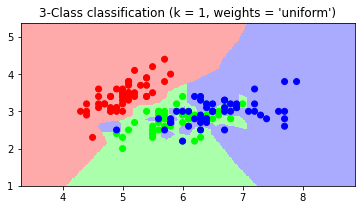

<Figure size 432x288 with 0 Axes>

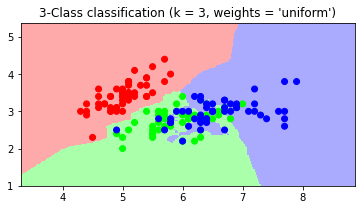

<Figure size 432x288 with 0 Axes>

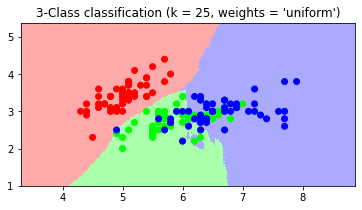

<Figure size 432x288 with 0 Axes>

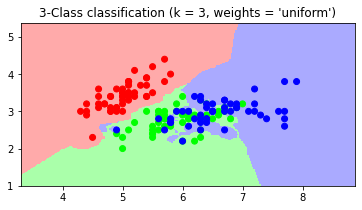

In [25]:
create_knn_plot('uniform', 1)
create_knn_plot('uniform', 3)
create_knn_plot('uniform', 25)
create_knn_plot('distance', 3)

The resulting figure shows the predictions of kNN when $k=1$. If `x_new` is in the blue region, the prediction will be the blue class. From this picture, we can observe a small blue blobs inside the predominantly gray area. This is because the nearest neighbor in this area is the blue example. 

**Question 1**. Change value of k to 3 and observe if there is any difference. Discuss what you see and why.

**Question 2**. Change k to an even higher value, let us say to 25. What do we see now? Discuss.

**Queston 3**. In the line that creates `clf` change weights='uniform' to weights='distance'. Check the documentation or google to understand what it means. Explain. Run the code and discuss if you see any difference.


**Answer 1:**

The first thing I notice with the change from 1 to 3 is the single blue dot near the left corner. At first, when it was looking for 1 closest point there was a blue region shaded (I imagine because it was recognizing itself). Now, however, when k=3, the three closest neighbors are green so even though it is a blue dot it gets classified in the green class.


**Answer 2:**

After seeing the results of k=1 and now k=25 I now think three is probably the best or *most accurate* option. I notice when k=25 in the center it looks like some of our green dots are now being classified in the blue region. Whereas in the example with k=3 those green dots maintained their correct class.


**Answer 3:**

This is related to the `weight` function of the prediction algorithm. The weight function determintes the `weight` that each point has attributed to it. With the `uniform` weight all points have the same weight. With the `distance` weight we are telling the algorithm that we want to place more significance on points closer to our target points and less significant the further away they are.

### Training and testing
  As mentioned above, the typical mechanism for testing accuracy of a `predictor` is to split the data randomly into training and testing, train `predictor` on training data and test its performance on test data. Let us see how it can be done.

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

**Question 4**. What is the size of the resulting objects?

Now that we created training and test sets, we can train a kNN classifier using the training data. Before moving forward, let us take a second and take a look at the documentation for kNN implementation in sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

**Answer 4:**

In [152]:
# Answer 4 continued
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 2)
(50, 2)
(100,)
(50,)


Let us train the kNN predictor:

In [153]:
k = 1   # number of nearest neighbors
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
print(predictor)

KNeighborsClassifier(n_neighbors=1)


Now that we trained `predictor` we can use it to provide predictions on any example `x`. 

In [202]:
# select the first 4 test examples
i = [0,1,2,3]
x = X_test[i,:]
print(x)
# predict its label
yhat = predictor.predict(x)
print(yhat)
# compare predicted and true labels
print("")
print(list(zip(yhat,y_test[i])))
first_four_results = y_test[:4]
print(first_four_results)
print(yhat)

[[5.5 3.5 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [5.7 3.8 1.7 0.3]
 [6.7 3.  5.2 2.3]]
[0 2 0 2]

[(0, 0), (2, 2), (0, 0), (2, 2)]
[0 2 0 2]
[0 2 0 2]


**Question 5**. Did your kNN predictor do a good job in predicting labels of the first 4 test examples? 

In [203]:
accuracy = predictor.score(x, first_four_results)
print(accuracy)

1.0


The result is `0.75` so I'd say that the accuracy should probably be better. My first thought is that maybe if we test this on a larger sample, instead of just four elements, maybe we will get better results.

**Question 6.** Write a piece of code that calculates the accuracy on those 4 test examples (number of correct guesses divided by the total number of guesses

In [204]:
def score_algorithm(predict_array, result_array):
    count = 0
    for i in range(len(predict_array)):
        if predict_array[i] == result_array[i]:
            count+=1
    return (count / (len(predict_array)))

acc = score_algorithm(yhat, first_four_results)
print("Accuarcy is: " + str(acc))

Accuarcy is: 1.0


**Question 7**. Find the predictions on all test examples in `X_test` and calculate the accuracy using your code from *Question 6*.

Pay attention that methods in sklearn.neighbors.KNeighborsClassifier allow you to test the accuracy in a faster way (you should not use it to answer Questions 6 and 7):

In [206]:
# predict its label
y_pred = predictor.predict(X_test)
# print(len(x))
# print(len(yhat))
# print(len(y_test))

acc2 = score_algorithm(y_pred, y_test)
print("Accuarcy is: " + str(acc2))

Accuarcy is: 0.98


**Question 8**. Train `predictor` using different choices of k. Try $k = 1, 3, 5, 15, 25, 50$. Report the accuracies on the test data (you can use the score method). Which choice of $k$ resulted in the highest accuracy? Comment briefly if the results make sense to you.

In [195]:
## Answer 8
k = [1, 3, 5, 15, 25, 50]
for n in k:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = n)
    predictor.fit(X_train, y_train)
#     acc = predictor.score(X_train, y_train)
    acc = predictor.score(X_test, y_test)
    print("Accuracy for {}:".format(n) + " {}".format(acc))

Accuracy for 1: 0.7
Accuracy for 3: 0.7
Accuracy for 5: 0.78
Accuracy for 15: 0.74
Accuracy for 25: 0.78
Accuracy for 50: 0.7


After testing the predictor about 10 times the most accurage options were `k=5,15,25` with the three fluctuating between which one was the number one highest. `k=1` was consistently the lowest score; this makes sense as this algorithm is focused on analyzing its neighboring ponints. The `5, and 15` variables definitely makes sense to me as a given point could easily look at 5 other points and they would all be of the same class. `k=25` seems a bit more dubious though as I would think that a given point starts looking too far outside of its *region* and getting mixed results.

**Question 9**. Other than choice of $k$, `KNeighborsClassifier` allows you to make some other choices. For example, in *Question 3* you saw that you can use a weighted prediction. There are few other options. Study the documentation and summarize in few sentences what other options you have when training the kNN classifier.

`n_jobs` - Used for parallel jobs to run for the underlying search algortihm. 

`algorithm` - If you want to change the type of the underlying search algorithm. Your options are `ball_tree`, `kd_tree`, `brute_force`

`leaf` - Two of the underyling algorithms are tree based. So, if you are trying to optimize run time then you can use this parameter to change the leaf size of the tree

## Lab 5.B Training kNN classifier on Iris and Wine Quality data (70% of grade)
In this part of the lab you will use your knowledge to train and test accuracy of kNN classifiers on Iris and Newsgroups data.

#### Iris Questions
In Lab 7.A you used only the first two attributes of Iris for prediction. You have 2 questions:

**Question Iris 1**. Train kNN classifier on other pair of attributes. Use $k$ of your choice and feel free to keep other choices at their default values. Which pair of attributes results in the highest accuracy?

In [414]:
print("K = 5")
k = 5
# Every possible attribute combo
attributes = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3] ]
for item in attributes:
#     print(item)
#     print(iris.data[:,item])
    X = iris.data[:,item]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    predictor = neighbors.KNeighborsClassifier(n_neighbors = n)
    predictor.fit(X_train, y_train)
    acc = predictor.score(X_test, y_test)
    print("Accuarcy for attribute pairs {}:".format(item) + " {}".format(acc))

print(" ")
print("K = 25")
k = 25
# Every possible attribute combo
attributes = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3] ]
for item in attributes:
    X = iris.data[:,item]
    y = iris.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    
    predictor = neighbors.KNeighborsClassifier(n_neighbors = n)
    predictor.fit(X_train, y_train)
    acc = predictor.score(X_test, y_test)
    print("Accuarcy for attribute pairs {}:".format(item) + " {}".format(acc))
    

# Even with changing K it appears attributes [0, 1] perform the best while [0, 2] perform the worst

K = 5
Accuarcy for attribute pairs [0, 1]: 0.8
Accuarcy for attribute pairs [0, 2]: 0.76
Accuarcy for attribute pairs [0, 3]: 0.8
Accuarcy for attribute pairs [1, 2]: 0.88
Accuarcy for attribute pairs [1, 3]: 0.94
Accuarcy for attribute pairs [2, 3]: 0.98
 
K = 25
Accuarcy for attribute pairs [0, 1]: 0.82
Accuarcy for attribute pairs [0, 2]: 0.84
Accuarcy for attribute pairs [0, 3]: 0.76
Accuarcy for attribute pairs [1, 2]: 0.94
Accuarcy for attribute pairs [1, 3]: 0.84
Accuarcy for attribute pairs [2, 3]: 0.98


Consistently running the algorithm shows that the pairs 0 and 1 cause lower accuracy scores, especially 0. For attributes 2 and 3 the accuracy typically seems to be higher

**Question Iris 2**. Train kNN classifier using all 4 attributes. Report the accuracy on test data set. Play with parameters of kNN to try to find a combination that results in the highest accuracy. Can you find something that works better than $k=3$ and default choices?

In [246]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train);
accuracy = predictor.score(X_test,y_test)
print("Accuracy: " + str(accuracy))

# Example of playing around with the parameters and getting a higher score
predictor2 = neighbors.KNeighborsClassifier(n_neighbors =20,weights='distance',metric='minkowski')
predictor2.fit(X_train, y_train);
accuracy2 = predictor2.score(X_test,y_test)
print("The accuracy using weight=distance, k=20, and metric=minkowski is " +str(accuracy2))

Accuracy: 0.94
The accuracy using weight=distance, k=20, and metric=minkowski is 0.96


# Wine Quality Questions
Wine Quality data set can be accessed from the UCI Machine Learning Repository website at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. In this lab you will be working with the white wine data set https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

**Question Wine 1** Perform EDA on the data set to get an insight into the data. Prepare 1 page pdf document summarizing the interesting aspects of the data. Upload the pdf file named WineEDA.pdf to Canvas.

In [513]:
wine = pd.read_csv('winequality-white.csv', sep=';')
# print(wine.shape)
# print(" ")
# print(wine.columns)
# print(" ")

### Splitting data into train and test sets (TODO: get 2000 random entries)

**Question Wine 2**. Since kNN is a relatively slow algorithms, create your data set by picking 2,000 examples randomly. Pay attention that the 12th column in the data set (quality) should be your label (call it y) and the first 11 columns should be your attribues (call it X). Because y are numbers from 0-10, let us create a binary label by converting ratings 7 and below to 0 and ratings above 7 as 1. Split your data into 66% training and 33% test data sets. Train a kNN classifier ($k=3$ and defaults) on the training data and test its accuracy on test data. Record the computational time needed to run this. Report the accuracy.

In [514]:
wine.loc[wine['quality'] <= 7, 'quality'] = 0
wine.loc[wine['quality'] > 7, 'quality'] = 1

In [515]:
X = wine.iloc[:, :11].values
y = wine['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

predictor = neighbors.KNeighborsClassifier(n_neighbors = 3)
predictor.fit(X_train, y_train)
acc = predictor.score(X_test, y_test)
print("Accuracy for k=3:".format(n) + " {}".format(acc))

Accuracy for k=3: 0.9542362399505256


**Question Wine 3**. Train a kNN classifier using different values of $k$ and any other different choice of hyperparameters, hoping to improve accuracy. Report the results.

In [516]:
#from sklearn.neighbors import KNeighborsClassifier
# number of nearest neighbors
k = [1, 3, 5, 15, 25, 50]
for n in k:
    predictor = neighbors.KNeighborsClassifier(n_neighbors = n)
    predictor.fit(X_train, y_train)
    acc = predictor.score(X_test, y_test)
    print("Accuracy for k={}:".format(n) + " {}".format(acc))

Accuracy for k=1: 0.9579468150896723
Accuracy for k=3: 0.9542362399505256
Accuracy for k=5: 0.95856524427953
Accuracy for k=15: 0.9548546691403834
Accuracy for k=25: 0.9548546691403834
Accuracy for k=50: 0.9548546691403834


**Question Wine 4** Pay attention that range of vallues for different attributes is quite different. *Question*: what is the impact of attributes with different ranges to kNN algorithm? In order to give each attribute equal change, scale each attribute to the same range to make sure the minimum is 0 and maximum is 1. *Question*: What is the formula to achieve this? Implement this formula and create a scaled data set (remember, any scaling you apply on the training data should also be used on the test data). Apply kNN and measure the accuracy. Did your accuracy improve?


In [530]:
from sklearn import preprocessing
# the normalize function requires a 2d array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)

This concept is called normalization and the purpose is to get all the attributes on the same scale. Notice that some of our columns already exist in a range from 0-1 but many other columns have values greater than one. One of the functions we can use is called `MinMaxScaler` and it will allow us to get all the columns in the range 0-1

### Some print statements to make sure data is getting normalized / formatted correctly

In [518]:
# our original feature set
print(X)
print(" ")
# new feature set with all features in the range  0 <= x <= 1
print(x_scaled)

[[ 7.    0.27  0.36 ...  3.    0.45  8.8 ]
 [ 6.3   0.3   0.34 ...  3.3   0.49  9.5 ]
 [ 8.1   0.28  0.4  ...  3.26  0.44 10.1 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]]
 
[[0.30769231 0.18627451 0.21686747 ... 0.25454545 0.26744186 0.12903226]
 [0.24038462 0.21568627 0.20481928 ... 0.52727273 0.31395349 0.24193548]
 [0.41346154 0.19607843 0.24096386 ... 0.49090909 0.25581395 0.33870968]
 ...
 [0.25961538 0.15686275 0.11445783 ... 0.24545455 0.27906977 0.22580645]
 [0.16346154 0.20588235 0.18072289 ... 0.56363636 0.18604651 0.77419355]
 [0.21153846 0.12745098 0.22891566 ... 0.49090909 0.11627907 0.61290323]]


In [531]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
print("Accuracy for k=3: {}".format(acc))

Accuracy for k=3: 0.14819782075483834


The accuracy doesn't seemed to have approved after normalizing the data. Looking at the examples run above for all of `k = [1, 3, 5, 15, 25, 50]` the min accuracy score we were getting was roughly `.95` and the max was roughly `.96`

**Question Wine 5** Instead of treating the last column (quality) as a class label, we can treat is as numeric output. In the original format, the numbers range from 0 to 10. If we want to predict that number, the problem becomes regression. As we covered in class, kNN can also be used for regression. It is also implemented by sklearn. Use sklearn to test the accuracy of knn regression. Remember that the formula for regression accuracy is average squared error, also called the Mean Squared Error (MSE). 

### NOTE! (I'M NOT SURE THAT THIS IS CORRECT 12/7)

The accuracy looks like it is way to low. I hardly understand the question anyway. Besides a quick Google search there does not appear to be any class notes on how to do this


In [522]:

wine = pd.read_csv('winequality-white.csv', sep=';')
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

x_scaled = min_max_scaler.fit_transform(X)
predictor = neighbors.KNeighborsRegressor(n_neighbors = 3)
predictor.fit(X_train, y_train)
acc = predictor.score(X_test, y_test)
print("Accuracy for k=3: {}".format(acc))

Accuracy for k=3: 0.14819782075483834


**Deliverables** Submit the 1-page pdf file for EDA. Also, submit this notebook (enhanced with needed code) with all answers (added as tect comments) and all executed code for all the questions.